In [26]:
# ============================================================
# 📦 Import Libraries
# ============================================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler, LabelEncoder, OneHotEncoder
from sklearn.ensemble import RandomForestRegressor
from scipy import stats


In [18]:
file_path = r'C:\Users\harjee\Downloads\Online Retail.xlsx'
df = pd.read_excel(file_path)
df.head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
5,536365,22752,SET 7 BABUSHKA NESTING BOXES,2,2010-12-01 08:26:00,7.65,17850.0,United Kingdom
6,536365,21730,GLASS STAR FROSTED T-LIGHT HOLDER,6,2010-12-01 08:26:00,4.25,17850.0,United Kingdom
7,536366,22633,HAND WARMER UNION JACK,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
8,536366,22632,HAND WARMER RED POLKA DOT,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom
9,536367,84879,ASSORTED COLOUR BIRD ORNAMENT,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom


In [7]:
# ============================================================
# 🧾 Dataset Overview
# ============================================================

# Check dataset info (datatypes + nulls)
df.info()

# Summary statistics for numeric and categorical features
df.describe(include="all").T


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,count,unique,top,freq,mean,min,25%,50%,75%,max,std
InvoiceNo,541909.0,25900.0,573585.0,1114.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
StockCode,541909,4070,85123A,2313,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Description,540455,4223,WHITE HANGING HEART T-LIGHT HOLDER,2369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Quantity,541909.0,NaN,NaN,NaN,9.55225,-80995.0,1.0,3.0,10.0,80995.0,218.081158
InvoiceDate,541909,NaN,NaN,NaN,2011-07-04 13:34:57.156386048,2010-12-01 08:26:00,2011-03-28 11:34:00,2011-07-19 17:17:00,2011-10-19 11:27:00,2011-12-09 12:50:00,NaN
UnitPrice,541909.0,NaN,NaN,NaN,4.611114,-11062.06,1.25,2.08,4.13,38970.0,96.759853
CustomerID,406829.0,NaN,NaN,NaN,15287.69057,12346.0,13953.0,15152.0,16791.0,18287.0,1713.600303
Country,541909,38,United Kingdom,495478,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [19]:
# ============================================================
# 🔍 Check Missing Values
# ============================================================

missing_values = df.isnull().sum()
print("Missing Values per column:\n", missing_values[missing_values > 0])

# Optional: Missing values percentage
missing_percentage = (df.isnull().mean() * 100).round(2)
print("\nMissing Percentage:\n", missing_percentage[missing_percentage > 0])


Missing Values per column:
 Description      1454
CustomerID     135080
dtype: int64

Missing Percentage:
 Description     0.27
CustomerID     24.93
dtype: float64


In [20]:
#================================================================
#Check Duplicate Values
#================================================================
initial_size = len(df)
df.drop_duplicates(inplace=True)
final_size = len(df)
print(f"Removed {initial_size - final_size} duplicate rows.")


Removed 5268 duplicate rows.


In [31]:
# ============================================================
# 🔄 Data Transformation
# ============================================================

# Separate numerical and categorical features
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("Numerical Columns:", list(num_cols))
print("Categorical Columns:", list(cat_cols))

# ------------------------------
# 1. Standardization (Z-score)
# ------------------------------
scaler = StandardScaler()
df_standardized = df.copy()
df_standardized[num_cols] = scaler.fit_transform(df_standardized[num_cols])

# ------------------------------
# 2. Normalization (Min-Max)
# ------------------------------
minmax_scaler = MinMaxScaler()
df_normalized = df.copy()
df_normalized[num_cols] = minmax_scaler.fit_transform(df_normalized[num_cols])

# ------------------------------
# 3. Smart Encoding for Categorical Columns
# ------------------------------

df_encoded = df.copy()

for col in cat_cols:
    unique_vals = df[col].nunique()
    if unique_vals <= 50:
        # Low-cardinality → One-Hot Encoding
        df_encoded = pd.get_dummies(df_encoded, columns=[col], drop_first=True)
        print(f"Applied One-Hot Encoding on: {col} ({unique_vals} categories)")
    else:
        # High-cardinality → Label Encoding
        df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col].astype(str))
        print(f"Applied Label Encoding on: {col} ({unique_vals} categories)")

print("\n✅ Encoding complete.")
print("Encoded dataset shape:", df_encoded.shape)

# ------------------------------
# Show Transformed DataFrames
# ------------------------------
print("\nStandardized Data (first 5 rows):")
display(df_standardized.head())

print("\nNormalized Data (first 5 rows):")
display(df_normalized.head())

print("\nEncoded Data (first 5 rows):")
display(df_encoded.head())


Numerical Columns: ['Quantity', 'UnitPrice', 'CustomerID', 'TotalPrice', 'RevenuePerInvoice']
Categorical Columns: ['InvoiceNo', 'StockCode', 'Description', 'Country']
Applied Label Encoding on: InvoiceNo (25900 categories)
Applied Label Encoding on: StockCode (4070 categories)
Applied Label Encoding on: Description (4223 categories)
Applied One-Hot Encoding on: Country (38 categories)

✅ Encoding complete.
Encoded dataset shape: (536641, 49)

Standardized Data (first 5 rows):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,TotalPrice,RevenuePerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,-0.016520,2010-12-01 08:26:00,-0.021419,1.498736,United Kingdom,2010,12,1,-0.007418,-0.50711
1,536365,71053,WHITE METAL LANTERN,-0.016520,2010-12-01 08:26:00,-0.012780,1.498736,United Kingdom,2010,12,1,0.005822,-0.50711
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,-0.007393,2010-12-01 08:26:00,-0.019362,1.498736,United Kingdom,2010,12,1,0.010183,-0.50711
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,-0.016520,2010-12-01 08:26:00,-0.012780,1.498736,United Kingdom,2010,12,1,0.005822,-0.50711
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,-0.016520,2010-12-01 08:26:00,-0.012780,1.498736,United Kingdom,2010,12,1,0.005822,-0.50711



Normalized Data (first 5 rows):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,TotalPrice,RevenuePerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,0.500037,2010-12-01 08:26:00,0.221150,0.926443,United Kingdom,2010,12,1,0.500045,0.500413
1,536365,71053,WHITE METAL LANTERN,0.500037,2010-12-01 08:26:00,0.221167,0.926443,United Kingdom,2010,12,1,0.500060,0.500413
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,0.500049,2010-12-01 08:26:00,0.221154,0.926443,United Kingdom,2010,12,1,0.500065,0.500413
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,0.500037,2010-12-01 08:26:00,0.221167,0.926443,United Kingdom,2010,12,1,0.500060,0.500413
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,0.500037,2010-12-01 08:26:00,0.221167,0.926443,United Kingdom,2010,12,1,0.500060,0.500413



Encoded Data (first 5 rows):


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,InvoiceYear,InvoiceMonth,InvoiceDay,...,Country_RSA,Country_Saudi Arabia,Country_Singapore,Country_Spain,Country_Sweden,Country_Switzerland,Country_USA,Country_United Arab Emirates,Country_United Kingdom,Country_Unspecified
0,0,3536,3918,6,2010-12-01 08:26:00,2.55,17850.0,2010,12,1,...,False,False,False,False,False,False,False,False,True,False
1,0,2794,3926,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,...,False,False,False,False,False,False,False,False,True,False
2,0,3044,913,8,2010-12-01 08:26:00,2.75,17850.0,2010,12,1,...,False,False,False,False,False,False,False,False,True,False
3,0,2985,1910,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,...,False,False,False,False,False,False,False,False,True,False
4,0,2984,2911,6,2010-12-01 08:26:00,3.39,17850.0,2010,12,1,...,False,False,False,False,False,False,False,False,True,False


In [21]:
# ============================================================
# 🔎 Data Type Validation
# ============================================================

print("Datatypes:\n", df.dtypes)

# Convert InvoiceDate to datetime if not already
if 'InvoiceDate' in df.columns and not np.issubdtype(df['InvoiceDate'].dtype, np.datetime64):
    df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'], errors="coerce")

# Ensure numeric columns are in correct dtype
numeric_cols = ['Quantity', 'UnitPrice']
for col in numeric_cols:
    if col in df.columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')


Datatypes:
 InvoiceNo              object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
UnitPrice             float64
CustomerID            float64
Country                object
dtype: object


In [22]:
# ============================================================
# ⚙️ Feature Engineering
# ============================================================

# Create new features from InvoiceDate
if 'InvoiceDate' in df.columns:
    df['InvoiceYear'] = df['InvoiceDate'].dt.year
    df['InvoiceMonth'] = df['InvoiceDate'].dt.month
    df['InvoiceDay'] = df['InvoiceDate'].dt.day

# Create TotalPrice column
if 'Quantity' in df.columns and 'UnitPrice' in df.columns:
    df['TotalPrice'] = df['Quantity'] * df['UnitPrice']

# (Optional) Revenue per Invoice
if 'InvoiceNo' in df.columns and 'TotalPrice' in df.columns:
    df['RevenuePerInvoice'] = df.groupby('InvoiceNo')['TotalPrice'].transform('sum')

df.head()


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,InvoiceYear,InvoiceMonth,InvoiceDay,TotalPrice,RevenuePerInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,2010,12,1,15.30,139.12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,139.12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,2010,12,1,22.00,139.12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,139.12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,2010,12,1,20.34,139.12


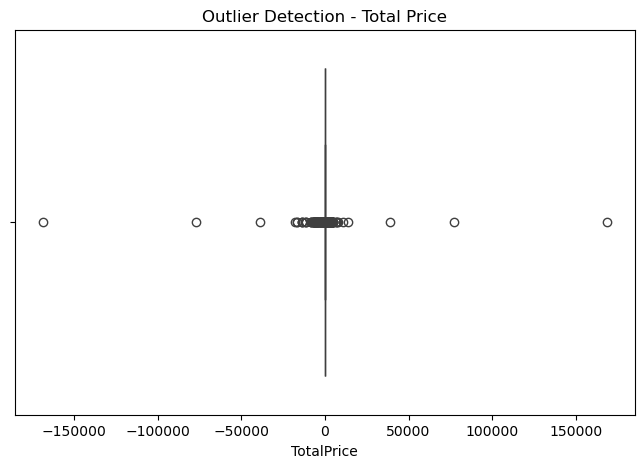

Outliers detected (Z>3): 7960


In [23]:
# ============================================================
# ⚠️ Outlier Detection
# ============================================================

# Boxplot to detect outliers in TotalPrice
if 'TotalPrice' in df.columns:
    plt.figure(figsize=(8,5))
    sns.boxplot(x=df['TotalPrice'])
    plt.title("Outlier Detection - Total Price")
    plt.show()

# Z-score method for numeric columns
numeric_cols = df.select_dtypes(include=['float64','int64']).columns
z_scores = np.abs(stats.zscore(df[numeric_cols]))
print("Outliers detected (Z>3):", (z_scores > 3).sum())


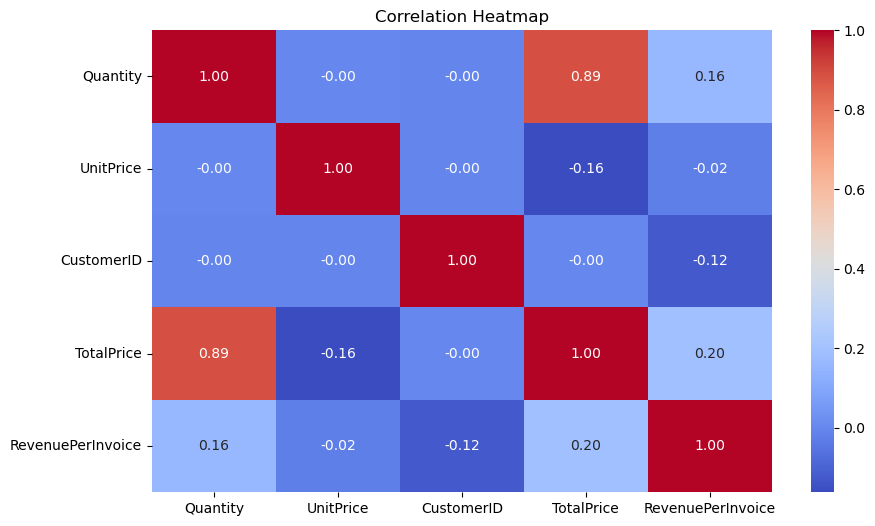

In [24]:
# ============================================================
# 📊 Correlation & Data Validation
# ============================================================

# Select numerical columns
numerical_df = df.select_dtypes(include=['float64','int64'])

# Correlation heatmap
plt.figure(figsize=(10,6))
sns.heatmap(numerical_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()


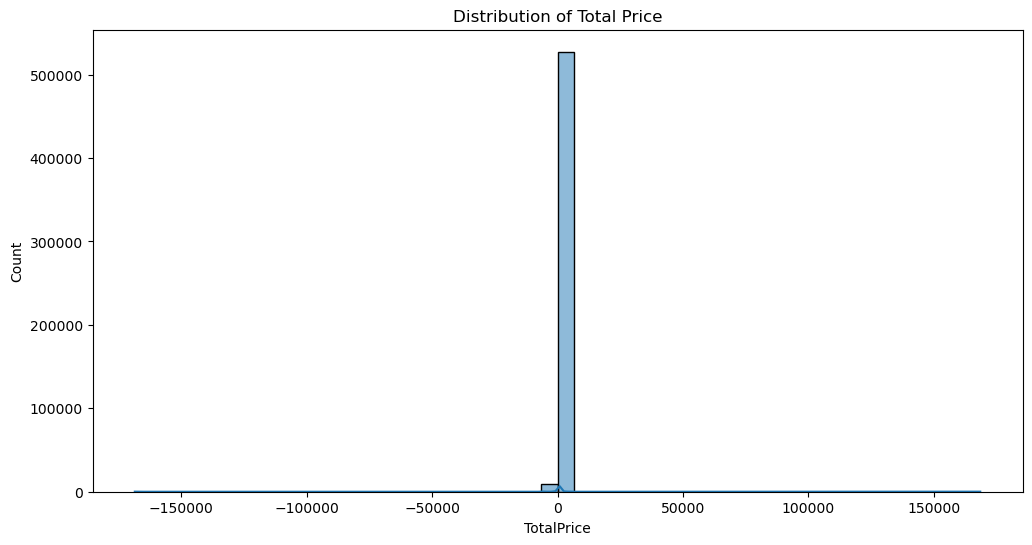

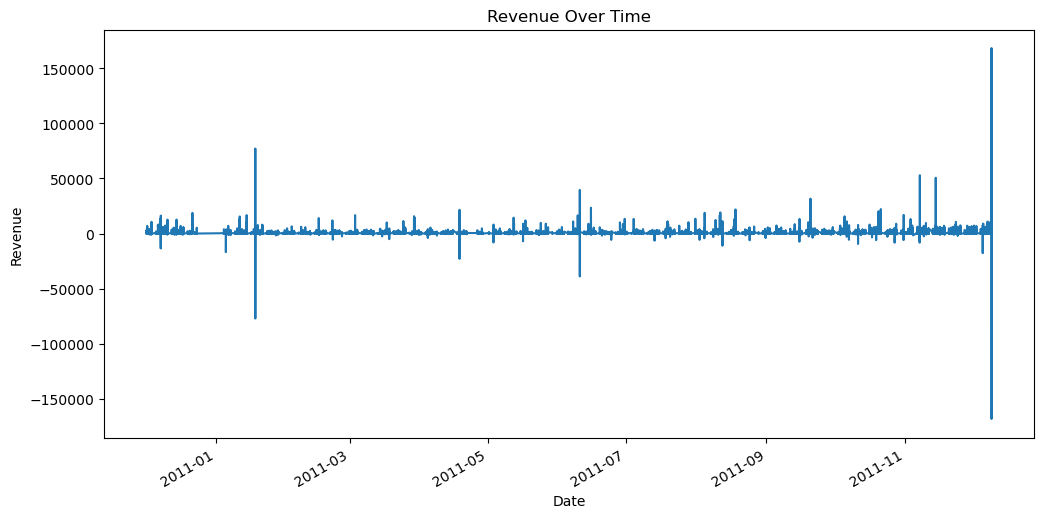

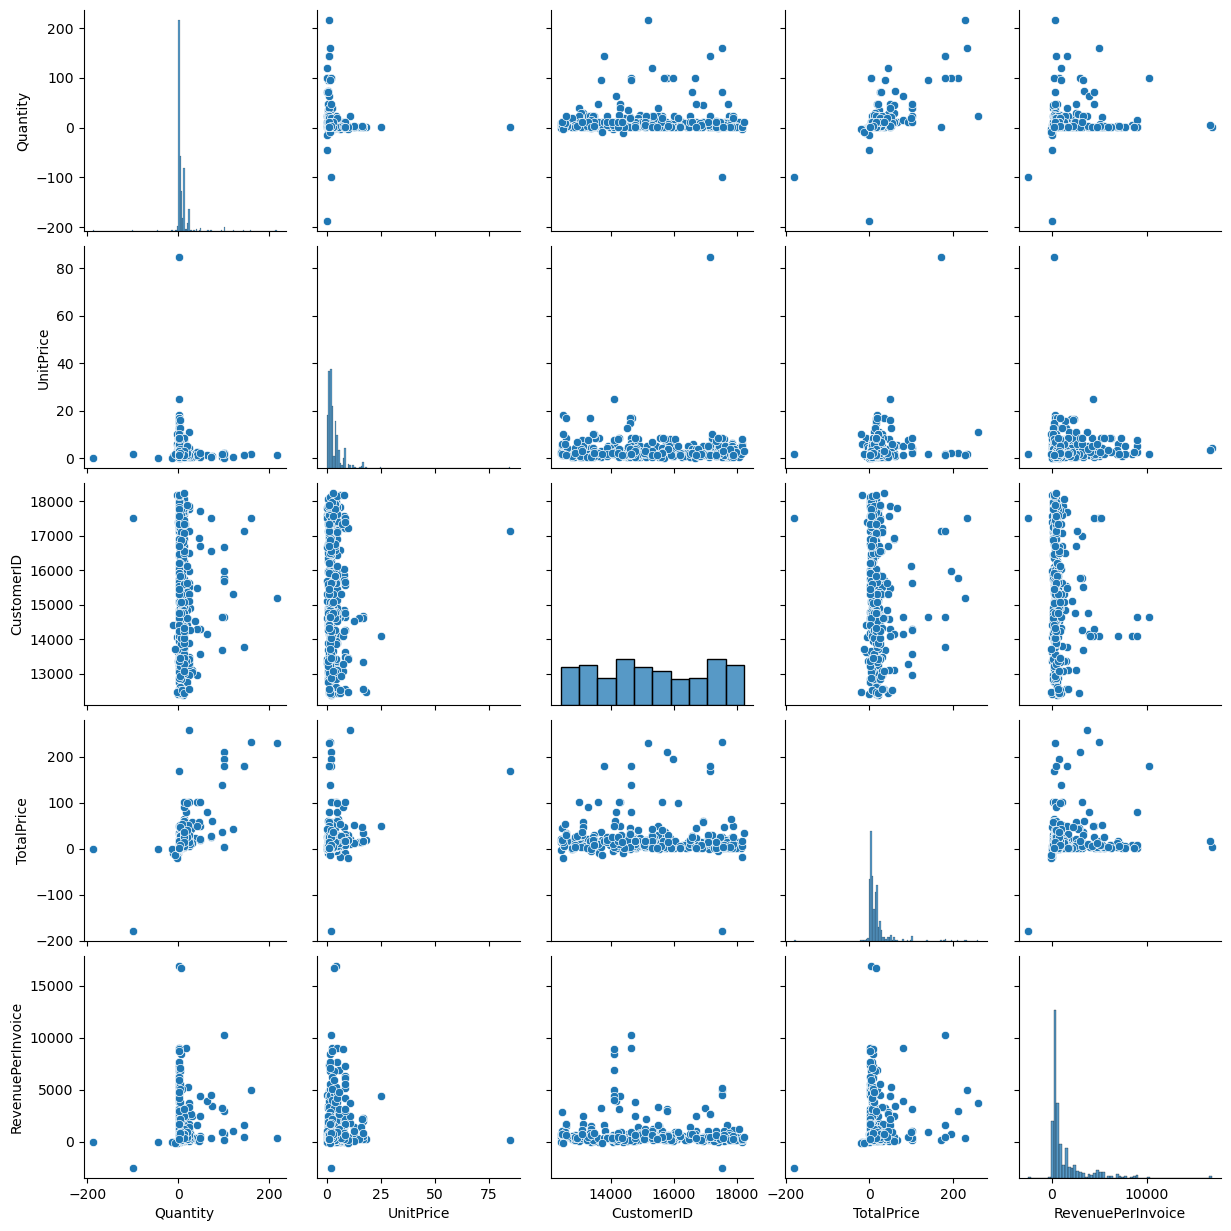

In [25]:
# ============================================================
# 📈 Additional Graphs
# ============================================================

# Distribution of Total Price
if 'TotalPrice' in df.columns:
    plt.figure(figsize=(12,6))
    sns.histplot(df['TotalPrice'], bins=50, kde=True)
    plt.title("Distribution of Total Price")
    plt.show()

# Sales trend over time
if 'InvoiceDate' in df.columns and 'TotalPrice' in df.columns:
    plt.figure(figsize=(12,6))
    df.groupby('InvoiceDate')['TotalPrice'].sum().plot()
    plt.title("Revenue Over Time")
    plt.xlabel("Date")
    plt.ylabel("Revenue")
    plt.show()

# Pairplot (optional, may be heavy on big data)
if len(numerical_df) > 0:
    sns.pairplot(numerical_df.sample(min(500, len(numerical_df))))
    plt.show()
